# Лабораторная работа №1.

### Задание 1

##### 1.1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from math import floor, ceil
%matplotlib inline

##### 1.2 Растяжение (интерполяция) изображения в N раз

In [2]:
img1 = Image.open("1.bmp").convert("RGB")

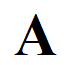

In [3]:
img1

In [4]:
def interpolation(img1, size):
    n = size
    old = np.asarray(img1)   
    rows, cols, layers = old.shape
    
    new = np.zeros( (n*rows - 1, n*cols - 1, layers) )
    print("previous size:", old.shape)
    
    for layer in range(3):
        for r in range(n*rows - 1):
            for c in range(n*cols - 1):
                new[r, c, layer] = old[floor(r / n),floor(c // n), layer]
                
    new = new.astype(np.uint8)
    print("new size:", new.shape)
 
    img2 = Image.fromarray(new)
    #img2.save("res1.1.bmp")
    
    return img2

In [8]:
img_res1 = interpolation(img1,4)

previous size: (65, 74, 3)
new size: (259, 295, 3)


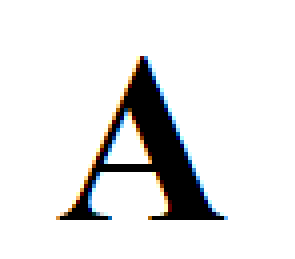

In [6]:
img_res1

##### 1.3 Сжатие (децимация) изображения в N раз

In [9]:
img2 = Image.open("2.bmp").convert("RGB")

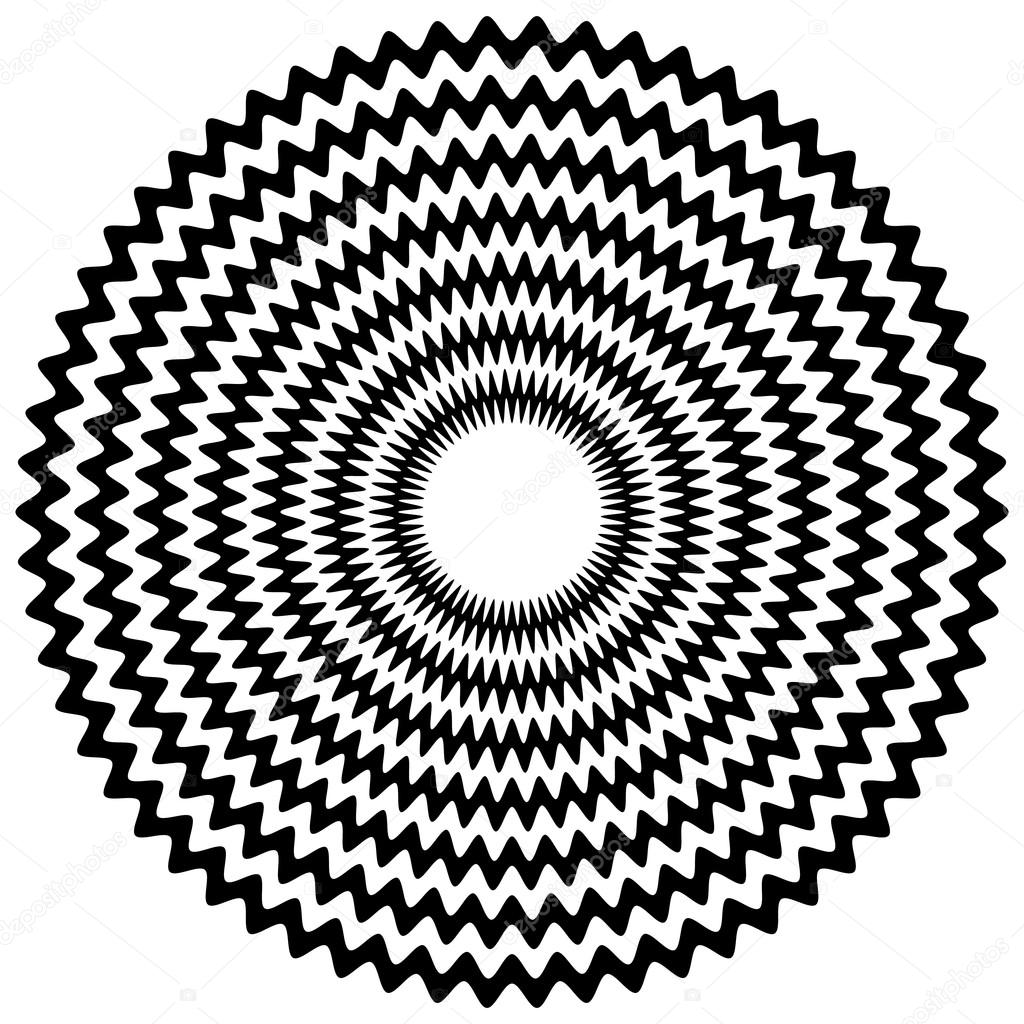

In [10]:
img2

In [11]:
def decimation(img, size):
    n = size
    old = np.asarray(img)   
    rows, cols, layers = old.shape
    
    new = np.zeros( (ceil(rows / n), ceil(cols / n), layers) )
    print("previous size:", old.shape)
    
    for layer in range(3):
        for r in range(0,rows,n):
            for c in range(0,cols,n):
                new[ceil(r / n), ceil(c / n), layer] = old[r,c, layer]
                
    new = new.astype(np.uint8)
    print("new size:", new.shape)
 
    img3 = Image.fromarray(new)
    
    return img3 

In [12]:
img_res2 = decimation(img2,5)

previous size: (1024, 1024, 3)
new size: (205, 205, 3)


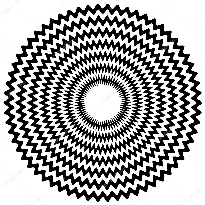

In [13]:
img_res2

##### 1.4 Передискретизация изображения в k = m / n раз

In [14]:
img3 = Image.open("3.bmp").convert("RGB")

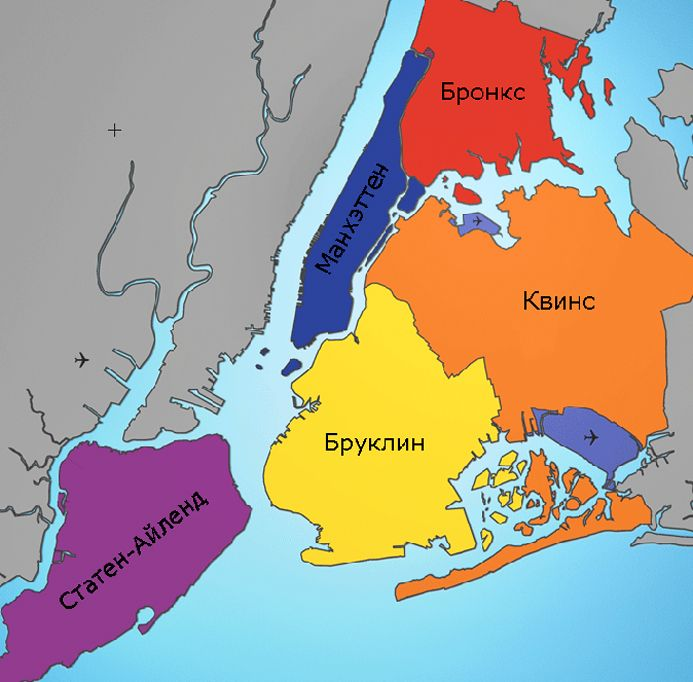

In [16]:
img3

In [17]:
img_res3 = interpolation(img3,3)

previous size: (682, 693, 3)
new size: (2045, 2078, 3)


In [18]:
img_res4 = decimation(img_res3,7)

previous size: (2045, 2078, 3)
new size: (293, 297, 3)


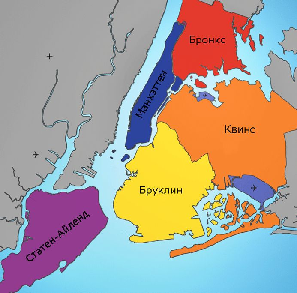

In [226]:
img_res4

##### 1.5 Передискретизация в К раз за один проход

In [19]:
def oversampling(img, size):
    n = size
    old = np.asarray(img)   
    rows, cols, layers = old.shape
    
    new = np.zeros( (int(rows*n), int(cols*n), layers) )
    print("previous size:", old.shape)
    
    for layer in range(3):
        for r in range(int(rows*n)):
            for c in range(int(cols*n)):
                new[r, c, layer] = old[int(r / n), int(c / n), layer]
                
    new = new.astype(np.uint8)
    print("new size:", new.shape)
 
    img3 = Image.fromarray(new)
    
    return img3 

In [20]:
img_res5 = oversampling(img3, 0.33)

previous size: (682, 693, 3)
new size: (225, 228, 3)


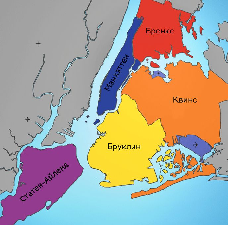

In [232]:
img_res5

### Задание 2

##### 2.2, 2.3 Создание нового изображения в режиме полутона, попиксельный расчет яркости

In [30]:
img4 = Image.open("4.bmp").convert("RGB")

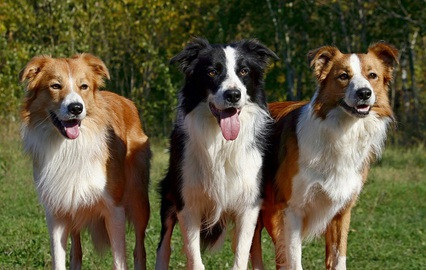

In [31]:
img4

In [32]:
def grayscale(img):  
    old = np.asarray(img)   
    rows, cols, layers = old.shape
    
    new = np.zeros( (rows, cols, layers) )
    
    for r in range(rows):
        for c in range(cols):

            red =   old[r][c][0]
            green = old[r][c][1]
            blue =  old[r][c][2]

            gray = (red / 3) + (green / 3) + (blue / 3)

            new[r][c][0] = int(gray)
            new[r][c][1] = int(gray)
            new[r][c][2] = int(gray)
    
    new = new.astype(np.uint8)
 
    img4 = Image.fromarray(new)
    img4.save("gray.bmp")
    
    return img4

In [33]:
def grayscale2(img):  
    old = np.asarray(img)   
    rows, cols, layers = old.shape
    
    new = np.zeros( (rows, cols) )
    
    for r in range(rows):
        for c in range(cols):

            red =   old[r][c][0]
            green = old[r][c][1]
            blue =  old[r][c][2]

            gray = (red / 3) + (green / 3) + (blue / 3)

            new[r][c] = int(gray)
    
    new = new.astype(np.uint8)
 
    img4 = Image.fromarray(new)
    img4.save("gray.bmp")
    
    return img4

In [34]:
gg = grayscale2(img4)

In [35]:
gg_arr = np.asarray(gg)

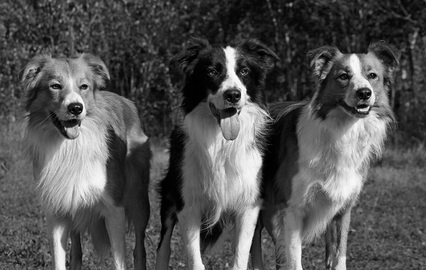

In [36]:
gg

In [37]:
img_res6 = grayscale(img4)

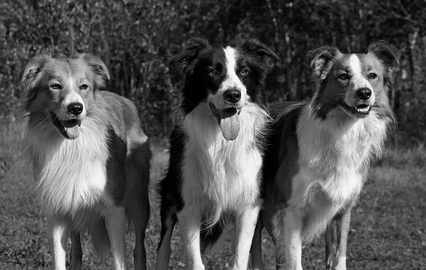

In [38]:
img_res6

### Задание 3. Приведение полутонового изображения к монохромному

##### Вариант 1. Алгоритм сбалансированного порогового отсечения гистограммы

In [21]:
def balanced_hist_thresholding(pic):
    img = plt.imread(pic)
    hist = plt.hist(img.ravel(),256,[0,256])#ravel - возвращает сплющенный массив
    plt.show()
    
    print(np.sum(hist[0][0:256]))
    
    #left = np.min(np.where(hist[0]>0))
    left = 0
    for i in range(0,256):
        if (hist[0][left] == 0):
            left += 1
    right = np.max(np.where(hist[0]>0))
    #right = 235
    #center = (left + right) // 2
    ctr_w = 0
    weight = np.sum(hist[0][0:256]) / 2
    for i in range(0,256):
        if (ctr_w <= weight):
            ctr_w += hist[0][i]
            center = i
    print(center) 
    
    w_l = np.sum(hist[0][0:center+1])
    w_r = np.sum(hist[0][center+1:right+1])
    
    while (left != right):
        if (w_r > w_l):
            w_r -= hist[0][right]
            right -= 1
            
            if (floor((left+right) / 2) < center):
                w_l -= hist[0][center]
                w_r += hist[0][center]
                center = (left + right) // 2
        else:
            w_l -= hist[0][left]
            left += 1
            
            if (floor((left+right)/2) > center & center < 255):
                #print("сдвиг центра вправо")
                #print("новый центр ",(left+right)//2,",старый центр ", center)
                w_l += hist[0][center+1]
                w_r -= hist[0][center+1]
                center = (left + right) // 2
                #print("left ", left, ",right ", right)
                #print("left weight ", w_l, ",right weight ", w_r)
                #print("")
        #print(w_l, w_r)
    return center

In [22]:
def pic_binary(img, threshold):
    old = np.asarray(img)   
    rows, cols, layers = old.shape
    
    binary = np.zeros( (rows, cols, layers) )
    
    for r in range(rows):
        for c in range(cols):
            if (old[r][c][0] >= threshold):
                binary[r][c][0] = 255
                binary[r][c][1] = 255
                binary[r][c][2] = 255
            else:
                binary[r][c][0] = 0
                binary[r][c][1] = 0
                binary[r][c][2] = 0
    
    binary = binary.astype(np.uint8)
 
    binary_img = Image.fromarray(binary)
    
    return binary_img

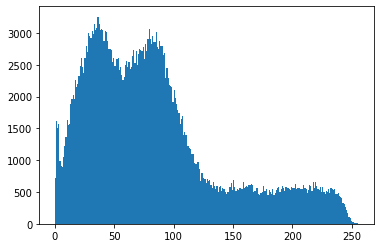

345060.0
72


In [23]:
pic = 'gray.bmp'
threshold = balanced_hist_thresholding(pic)#426x270=115020

In [40]:
pic_binary(img_res6, threshold)

##### Попытка №2

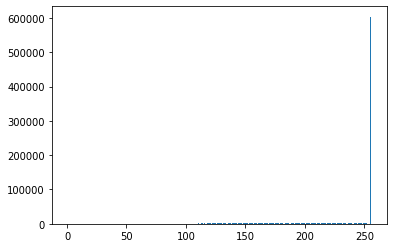

786432.0
255


In [41]:
pic = 'text.bmp'
threshold = balanced_hist_thresholding(pic)#512x512 = 262144

In [42]:
threshold

255

In [43]:
img5 = Image.open("text.bmp").convert("RGB")

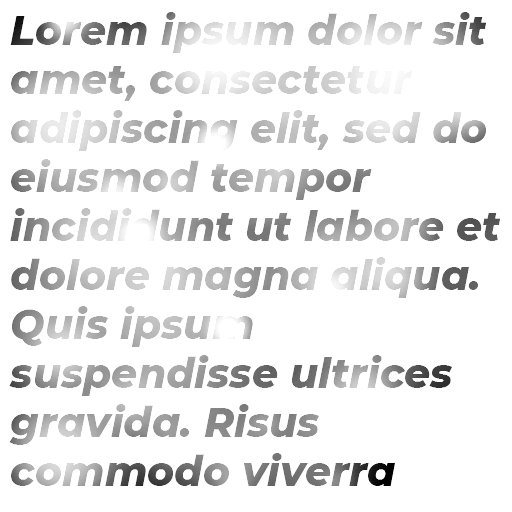

In [44]:
img5

In [46]:
res = pic_binary(img5, threshold)
res.save('A.bmp')